In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



## Question: What about Mixed color and Intake type?

In [15]:
dog_df = pd.read_csv("../../main_data/locale_specific_data/Sonoma_nontime_cleaned_ry.csv").drop(["Unnamed: 0"], axis=1)

dog_df['sex_bin'] = 1*(dog_df.sex=="Female")

size_dict = {'PUPPY':0, 'TOY':1, 'SMALL':2, 'MED':3, 'LARGE':4,'X-LRG':5}
dog_df['size_bin'] = dog_df['size'].map(size_dict)
del size_dict

dog_df['breed_pit'] = 1*(dog_df.breed.str.contains("PIT"))

dog_df['color_mix'] = 1*((dog_df.color.str.contains("/"))|(dog_df.color.str.contains("TRICOLOR"))|(dog_df.color.str.contains("BRINDLE")))

intake_dict = {'STRAY':0, 'OWNER SURRENDER':1, 'ADOPTION RETURN':2, 'CONFISCATE':3, 'TRANSFER':4,'QUARANTINE':5, "BORN HERE":6}
dog_df['intake_bin'] = dog_df['intake_type'].map(intake_dict)
del intake_dict

dog_df.head(10)

,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,...,outcome_adopt,outcome_adopt_subtype,intake_age,outcome_age,pop_control,sex_bin,size_bin,breed_pit,color_mix,intake_bin
0,PIT BULL,GRAY/WHITE,Female,MED,2012-09-03,A296009,2013-08-22,2014-04-14,235,TRANSFER,...,False,none,0.97,1.61,1,1,3,1,1,4
1,PIT BULL,BLUE/WHITE,Female,MED,2012-10-09,A294143,2013-08-31,2014-04-14,226,STRAY,...,False,none,0.89,1.51,1,1,3,1,1,0
2,CAROLINA DOG/MIX,GOLD/WHITE,Male,MED,2007-09-07,A281788,2013-09-19,2014-07-30,314,STRAY,...,False,none,6.03,6.90,0,0,3,0,1,0
3,CHIHUAHUA SH,TAN,Male,TOY,2007-10-01,A297574,2013-10-01,2014-01-01,92,OWNER SURRENDER,...,False,none,6.00,6.25,1,0,1,0,0,1
4,PIT BULL,TAN/WHITE,Male,MED,2012-10-29,A298002,2013-10-08,2014-05-22,226,STRAY,...,True,realtime,0.95,1.57,1,0,3,1,1,0
5,PIT BULL/MIX,TAN/WHITE,Female,MED,2011-10-12,A298061,2013-10-09,2014-02-15,129,STRAY,...,True,realtime,1.99,2.34,1,1,3,1,1,0
6,PIT BULL,BLACK,Female,LARGE,2010-11-22,A298914,2013-10-30,2014-03-29,150,STRAY,...,True,realtime,2.94,3.35,1,1,4,1,0,0
7,CHIHUAHUA SH,BLACK/TAN,Male,TOY,2002-12-04,A299080,2013-11-02,2014-01-04,63,STRAY,...,True,realtime,10.91,11.08,1,0,1,0,1,0
8,CHIHUAHUA SH,BLUE/FAWN,Male,SMALL,2011-11-21,A299340,2013-11-12,2014-06-21,221,TRANSFER,...,True,realtime,1.98,2.59,1,0,2,0,1,4
9,TOY FOX TERRIER,WHITE/BLACK,Male,TOY,2005-04-01,A025040,2013-11-16,2014-01-31,76,OWNER SURRENDER,...,False,none,8.62,8.83,1,0,1,0,1,1


## Replace outcome season by intake season, add color_mix, remove sex, add intake_bin

In [53]:
# feature_list = ['sex_bin','size_bin','breed_pit','days_in_shelter','outcome_season','intake_age']
feat_list = [#'sex_bin',
             'size_bin',
            #  'breed_pit',
             'days_in_shelter',
            #  'outcome_season',
             'intake_season',
             'intake_age',
             'color_mix',
             'intake_bin']


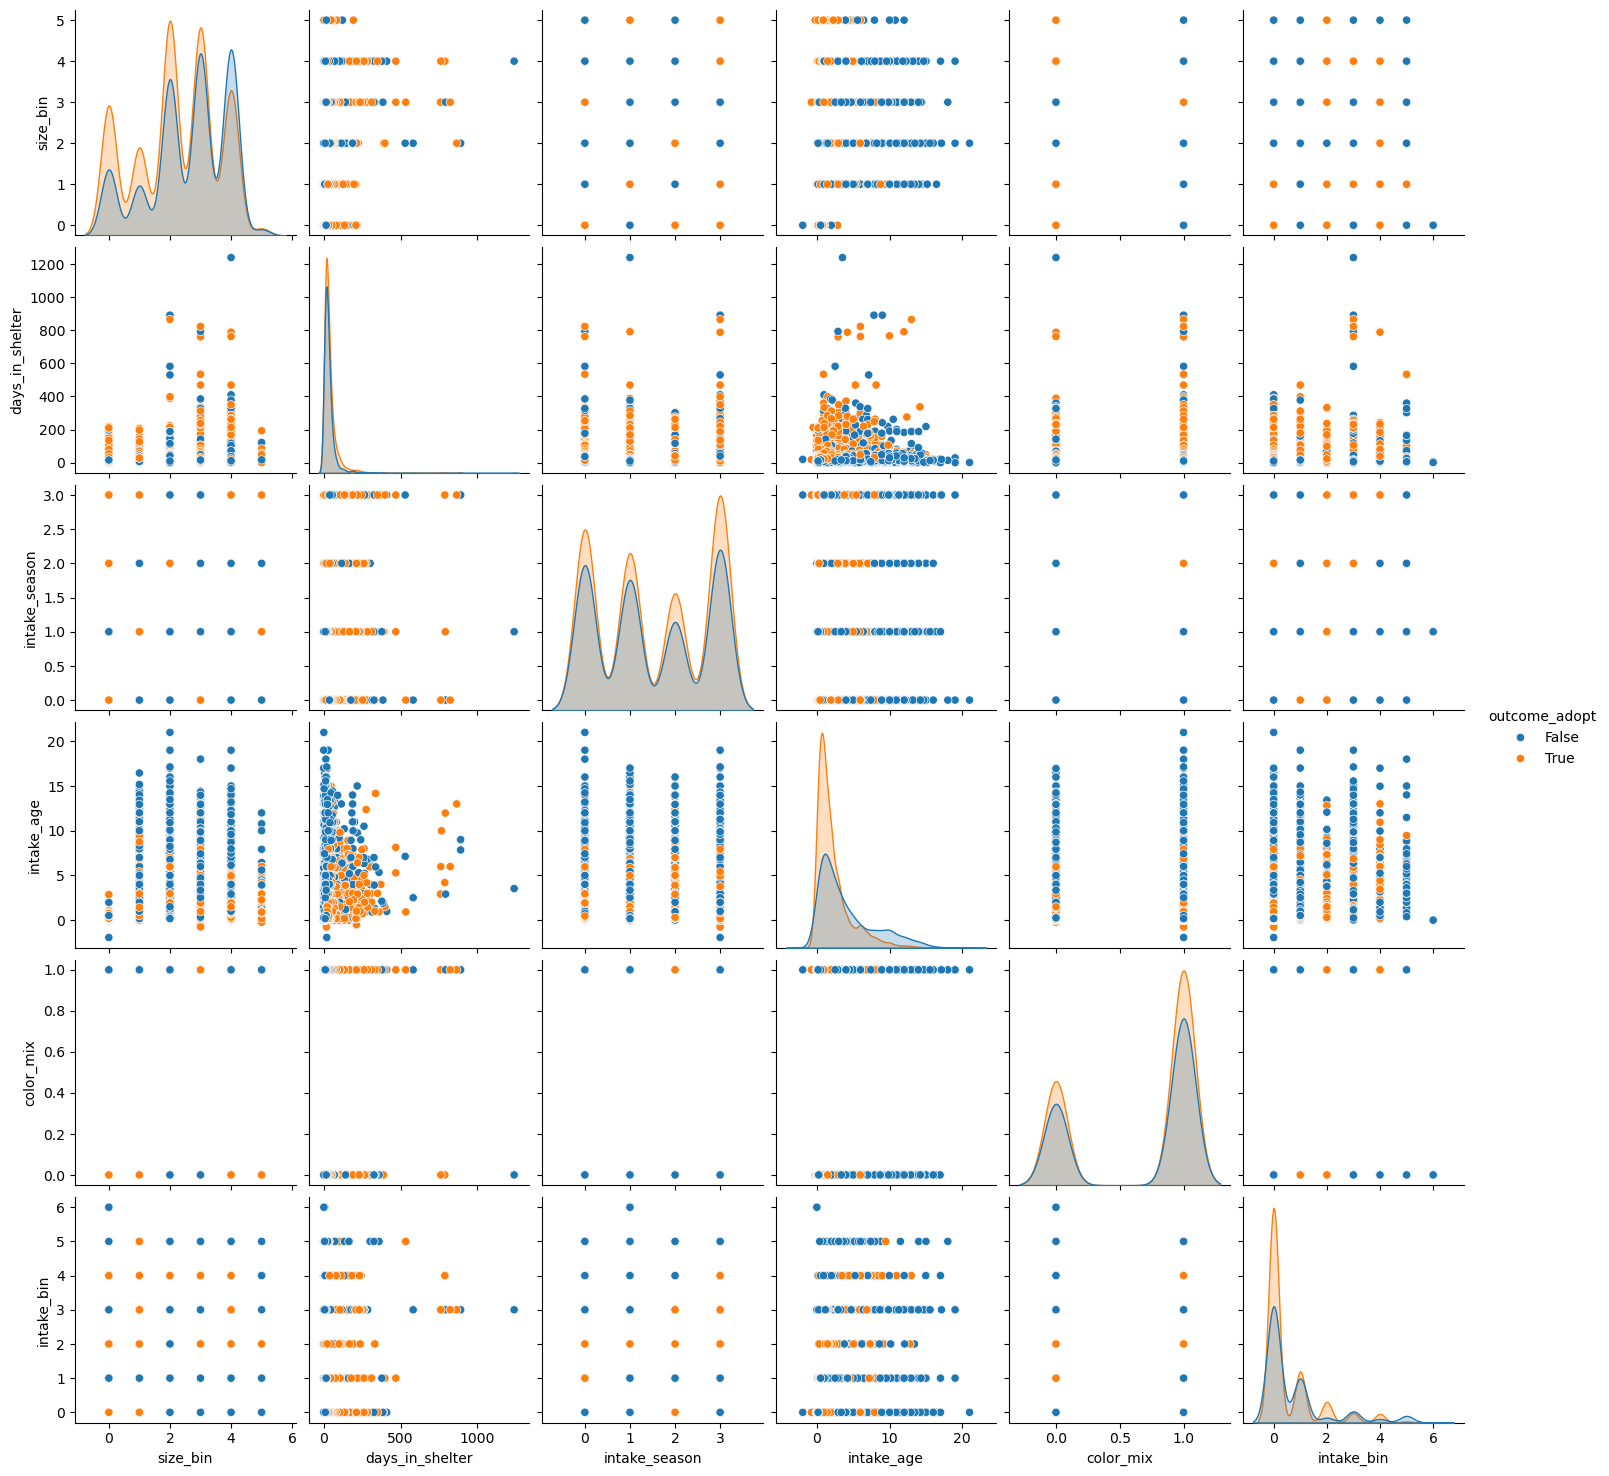

In [54]:
sns.pairplot(data=dog_df,
x_vars=feat_list,
y_vars=feat_list,
hue="outcome_adopt")

In [42]:
#sns.histplot(data=dog_df[dog_df.outcome_adopt==True], x="days_in_shelter", hue="breed_pit", stat='proportion', multiple='stack', kde=True)

In [55]:
X_t, X_h, y_t, y_h = train_test_split(dog_df[feat_list],
                                      dog_df.outcome_adopt,
                                      shuffle=True,
                                      stratify=dog_df.outcome_adopt,
                                      test_size=0.2,
                                      random_state=1342)
                                      

In [44]:
# adoption_prob_cutoff = 1/2

# for DEP in range(3, 12):
#     rf_forst = RandomForestClassifier(n_estimators=500, max_depth=DEP).fit(X_t, y_t)
#     et_forst = ExtraTreesClassifier(n_estimators=500, max_depth=DEP).fit(X_t, y_t)

#     score_df = pd.DataFrame({'feature':X_t.columns, 'rf_importance':rf_forst.feature_importances_, 'et_importance':et_forst.feature_importances_}, index=X_t.columns)
#     print( score_df.loc["breed_pit"] )
#     del score_df

#     rf_adopt_pred = 1 * (rf_forst.predict_proba(X_t)[:, 1] > adoption_prob_cutoff )
#     print( "RandomForest: ", DEP, round(accuracy_score(y_pred = rf_adopt_pred, y_true = y_t), 2))

#     et_adopt_pred = 1 * (et_forst.predict_proba(X_t)[:, 1] > adoption_prob_cutoff )
#     print( "ExtraForest: ", DEP, round(accuracy_score(y_pred = et_adopt_pred, y_true = y_t), 2))

#     del rf_forst, rf_adopt_pred, et_forst, et_adopt_pred
#     print()

In [45]:
# adoption_prob_cutoff = 2/3

# for DEP in range(3, 12):
#     rf_forst = RandomForestClassifier(n_estimators=500, max_depth=DEP).fit(X_t, y_t)
#     et_forst = ExtraTreesClassifier(n_estimators=500, max_depth=DEP).fit(X_t, y_t)

#     score_df = pd.DataFrame({'feature':X_t.columns, 'rf_importance':rf_forst.feature_importances_, 'et_importance':et_forst.feature_importances_}, index=X_t.columns)
#     print( score_df.loc["breed_pit"] )
#     del score_df

#     rf_adopt_pred = 1 * (rf_forst.predict_proba(X_t)[:, 1] > adoption_prob_cutoff )
#     print( "RandomForest: ", DEP, round(accuracy_score(y_pred = rf_adopt_pred, y_true = y_t), 2))

#     et_adopt_pred = 1 * (et_forst.predict_proba(X_t)[:, 1] > adoption_prob_cutoff )
#     print( "ExtraForest: ", DEP, round(accuracy_score(y_pred = et_adopt_pred, y_true = y_t), 2))

#     del rf_forst, rf_adopt_pred, et_forst, et_adopt_pred
#     print()

In [56]:
# no depth limit, changing number of trees

# adoption_prob_cutoff = 2/3

cutoff_list = [0.1, 1/2, 0.667]

# tree_number = [50, 150, 300, 500]
tree_number = [200]


for CUT in cutoff_list:

    for EST in tree_number:
        rf_forst = RandomForestClassifier(n_estimators=EST).fit(X_t, y_t)
        et_forst = ExtraTreesClassifier(n_estimators=EST).fit(X_t, y_t)

        # score_df = pd.DataFrame({'feature':X_t.columns, 'rf_importance':rf_forst.feature_importances_, 'et_importance':et_forst.feature_importances_}, index=X_t.columns)
        # print( score_df.loc["breed_pit"] )
        # del score_df
        score_df = pd.DataFrame({'feature':X_t.columns, 'rf_importance':rf_forst.feature_importances_, 'et_importance':et_forst.feature_importances_}, index=X_t.columns)
        print( score_df)
        del score_df

        rf_adopt_pred = 1 * (rf_forst.predict_proba(X_t)[:, 1] > CUT )
        print( "RandomForest: ", "n_est=",EST, "cutoff=", CUT, "accuracy=", round(accuracy_score(y_true = y_t, y_pred = rf_adopt_pred), 2))
        print(confusion_matrix(y_true = y_t, y_pred = rf_adopt_pred, normalize='all'))

        et_adopt_pred = 1 * (et_forst.predict_proba(X_t)[:, 1] > CUT )
        print( "ExtraTrees: ",  "n_est=",EST, "cutoff=", CUT, "accuracy=", round(accuracy_score(y_true = y_t, y_pred = et_adopt_pred), 2))
        print(confusion_matrix(y_true = y_t, y_pred = et_adopt_pred, normalize='all'))

        del rf_forst, rf_adopt_pred, et_forst, et_adopt_pred
        print()

                         feature  rf_importance  et_importance
size_bin                size_bin       0.069269       0.065580
days_in_shelter  days_in_shelter       0.353745       0.378211
intake_season      intake_season       0.066219       0.055363
intake_age            intake_age       0.404414       0.416558
color_mix              color_mix       0.027622       0.017729
intake_bin            intake_bin       0.078731       0.066560
RandomForest:  n_est= 200 cutoff= 0.1 accuracy= 0.73
[[0.17352037 0.27478862]
 [0.         0.55169101]]
ExtraTrees:  n_est= 200 cutoff= 0.1 accuracy= 0.99
[[0.4415834  0.0067256 ]
 [0.         0.55169101]]

                         feature  rf_importance  et_importance
size_bin                size_bin       0.068334       0.065219
days_in_shelter  days_in_shelter       0.356297       0.376329
intake_season      intake_season       0.063981       0.056564
intake_age            intake_age       0.405697       0.416685
color_mix              color_mix     